<a href="https://colab.research.google.com/github/yashwanth-854/ML-projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn import metrics
from xgboost import XGBRegressor

In [6]:
#importing the Dataset from sklearn
house_price_df=pd.read_csv('/content/Boston.csv')
house_price_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
house_price_df.rename(columns={'Unnamed: 0':'sno' },inplace=True)

In [17]:
house_price_df.head()

,sno,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
#checking for missing values
house_price_df.isnull().sum()

sno        0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
price      0
dtype: int64

In [16]:
#checking the number of datapoints we have
house_price_df.shape

(506, 15)

In [19]:
#understanding the statistics of our dataframe
house_price_df.describe()

,sno,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

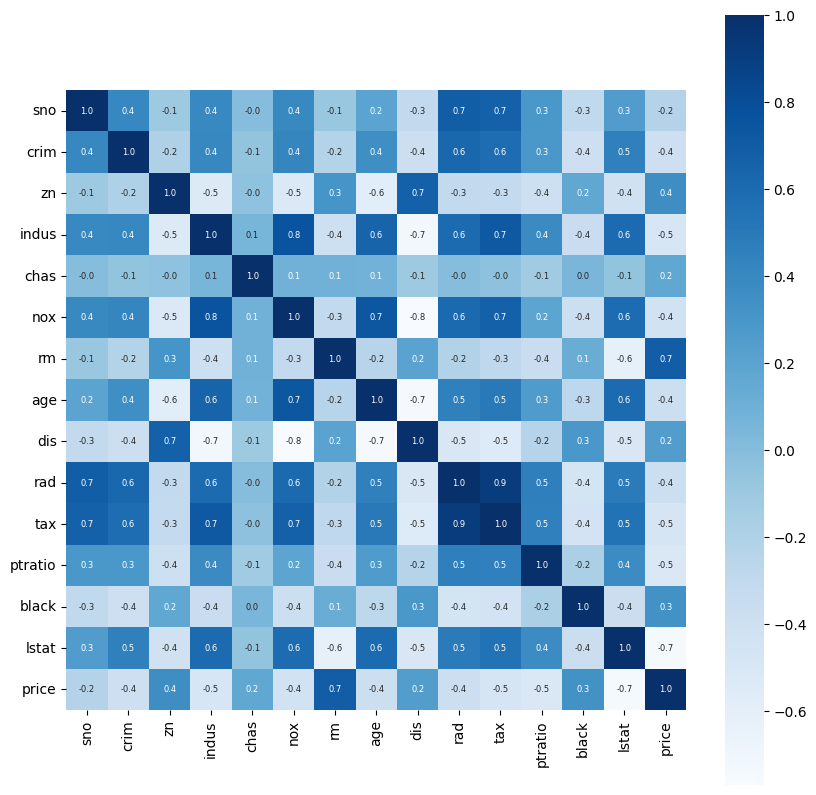

In [20]:
#understanding the correlation of the features using heatmap
correlation=house_price_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',square=True,cmap='Blues',annot=True,annot_kws={'size':6})

In [21]:
#Splitting the data and target
X=house_price_df.drop(['price'],axis=1)
Y=house_price_df['price']

In [22]:
print(X)
print(Y)

     sno     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio   black  lstat
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1      2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2      3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3      4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4      5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67
502  503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  505  

In [25]:
#splitting the data into train data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)
print(X.shape,X_train.shape,X_test.shape)

(506, 14) (404, 14) (102, 14)


In [26]:
#loading the model
model =XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
#Evaluation of the model
training_data_prediction=model.predict(X_train)
print(training_data_prediction)

[23.09445   20.99228   20.104528  34.69831   13.914912  13.498504
 22.000854  15.206232  10.898076  22.688675  13.796982   5.5959272
 29.802038  49.994926  34.892696  20.604803  23.389652  19.206667
 32.705322  19.597044  27.001009   8.393553  45.992256  21.694191
 27.081312  19.393814  19.28983   24.808271  22.62144   31.703571
 18.53784    8.701313  17.409687  23.69455   13.296358  10.484301
 12.670515  24.996946  19.696505  14.900087  24.200705  24.997162
 14.898304  16.99991   15.596548  12.707401  24.497099  15.003988
 50.000412  17.52259   21.200375  32.00222   15.606369  22.901505
 19.329111  18.692701  23.293829  37.20319   30.102093  33.101288
 20.993074  49.98552   13.401927   5.0106983 16.492916   8.401298
 28.686829  19.479248  20.587677  45.404484  39.802147  33.40655
 19.803558  33.414024  25.298645  49.994335  12.5361395 17.434805
 18.607355  22.591953  50.005043  23.799427  23.305088  23.090717
 41.715034  16.104162  31.589657  36.099537   7.0034914 20.38737
 19.988699 

In [28]:
# R square error
score_1=metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print(" R square error: ",score_1)
print(" Mean Absolute error: ",score_2)

 R square error:  0.9999981148690247
 Mean Absolute error:  0.00899344245986183


Text(0, 0.5, 'Predicted Prices')

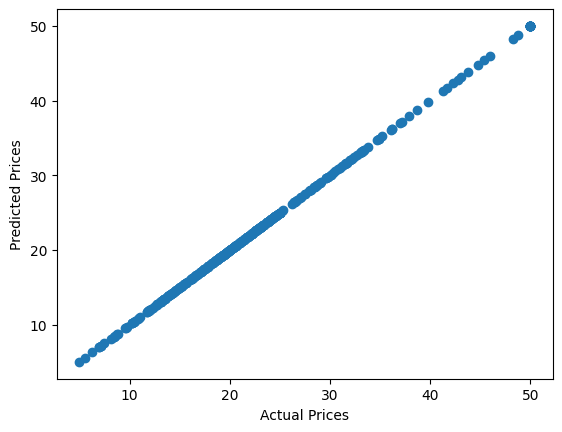

In [36]:
# Visualizing
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [31]:
# accuracy on the test data
testing_data_prediction=model.predict(X_test)
score_3=metrics.r2_score(Y_test,testing_data_prediction)
score_4=metrics.mean_absolute_error(Y_test,testing_data_prediction)

print(" R square error: ",score_3)
print(" Mean Absolute error: ",score_4)

 R square error:  0.9126650746118214
 Mean Absolute error:  2.0080178139256493
